<a href="https://colab.research.google.com/github/MartinezAddiego/GU-NSCI526-Tutorials/blob/main/NSCI_6006_01_Intro_to_Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction To Perceptrons

Flo Martinez Addiego (fam53@georgetown.edu)

NSCI-6006-01 Computational Neuroscience

Class taught by Dr. Maximilian Riesenhuber

Georgetown University

### Background Information

From Max's second lecture, he talks about how if we want to describe the brain as a computer, then we should be able to understand what a single neuron can do by itself and then as a group.

We know from the first lecture (and the reminder from the second lecture!) that biologically a neuron will take in a bunch of inputs and, based on different spatial and temporal properties of these inputs, will sum the inputs together.

If the sum is greater than some value (the threshold!), it triggers an action potential and produces an output! If not, it doesn't.


<img src='https://www.moleculardevices.com/applications/patch-clamp-electrophysiology/media_1c6efa9f5f7a50e4dab68c492527445b7fdabda54.jpeg?width=750&format=jpeg&optimize=medium'></img>


The operation that is happening for the neuron to fire (spike) or not is inherently non-linear because it is dependent on a threshold.

This is all well and good, but how might we represent this computationally? Enter Rosenblatt's Perceptron (1958):

<img src='https://www.oreilly.com/api/v2/epubs/9781788990547/files/assets/36bb334b-4393-4c4c-82a8-ecac23d4ac70.png'></img>

The idea being shown in this image is that we have a series of inputs (I_1 to I_N) that are each going to be multiplied by their own weights (W_1 to W_N). This will give us N individual values which are then summed together. If this sum surpasses a threshold, then we will see the output y.


Mathematically, this may be represented as:
\begin{align}
        \sum_{i=1}^n x_i w_i
    \end{align}

(dot product of the weights and the corresponding input)

### Rosenblatt's Perceptron (1958): What does it really DO?

The perceptron will solve any linearly separable problem by dividing the representational space into two fields - one that leads to a classification class of 1 and the other that leads to a classification class of 0, for example. It does this by finding a hyperplane in n-dimensional space.

The perceptron was revolutionary because it was able to actually "learn" -- given the labels for a series of training images, a perceptron would aim to figure out the generalizable hyperplane that would allow it to solve this problem for unknown data such that it would produce the correct output (identify the correct class).

### How does it do this?

The perceptron will use an algorithm to modify its weights, ultimately hopefully learning the correct ones.

Let's again show this mathematically -

\begin{align}
        w_{ji} = w_{ji} + \eta(y_j -ypred_j)*ypred_i
    \end{align}

In this case, we are showing that the weights are being updated after an attempt using both a learning rate (defines how much of a change to make) and the difference between the actual value and the predicted value.

As we learn, we want to be able to decrease the training set error.

### Now, let's go ahead and simulate this with some code...

In [51]:
#importing different python libraries with their own functionalities
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

Let's first generate a series of inputs and weights (assume that we have three inputs and they will each have their own weight)

In [ ]:
inputs = np.array([0.1, 0.5, 0.2])
weights = np.array([0.4, 0.3, 0.6])

Now, we need to take the dot product of each of these weights, following the equation:

\begin{align}
        \sum_{i=1}^n x_i w_i
    \end{align}


** note that this is just the sum of the individual products...I will show it both ways to convince you :)

In [ ]:
# in this cell, I am creating an empty list to store the mutliplicative values. Then I will iterate through all the numbers in inputs and multiply the input with its corresponding weight
# in the end, I will sum all the values and this will be the weighted sum
store_vals = []
for val in np.arange(len(inputs)):
  hold = inputs[val]*weights[val]
  store_vals.append(hold)

np.sum(store_vals)

0.31

In [ ]:
#Thankfully, we don't always have to do this! We can use the built-in function from numpy (np.dot) and it will do the exact same thing...compare the outputs for yourselves :)
dot_prod_output = np.dot(inputs,weights)
print(dot_prod_output)

0.31


Great! Now we need to decide what our threshold is...
Following the logic from the Rosenblatt perceptron, let's create a step function.

In this function if the value is less than the threshold, we will get no output (zero). Else, if the value is greater than the threshold, we will get an output (one)

In [4]:
chosen_threshold = 1

To build some intuition for what this might look like, let's go ahead and plot the function below:

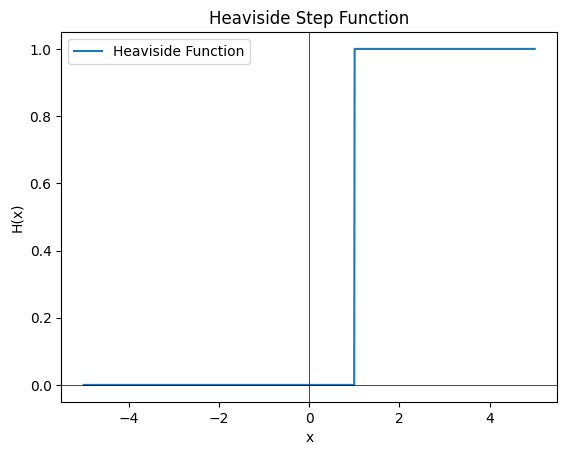

In [ ]:

# Define the Heaviside function
def heaviside(x):
    return np.heaviside(x-chosen_threshold, 1)

# Generate values for x
x = np.linspace(-5, 5, 1000)
y = heaviside(x)

# Create the plot
plt.plot(x, y, label="Heaviside Function")
plt.title("Heaviside Step Function")
plt.xlabel("x")
plt.ylabel("H(x)")
plt.grid(False)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

In [ ]:
def activation_function(dot_product):
  if dot_product > chosen_threshold:
    return 1
  else:
    return 0

In [ ]:
# let's now go ahead and put this all together

def perceptron(x_input,w_weight):
  dot_product_output = np.dot(x_input,w_weight)
  fire = activation_function(dot_product_output)
  return fire


In [ ]:
output = perceptron(inputs,weights)
if output == 0:
  print("Our perceptron didn't fire!")
else:
  print("Our perceptron fired!")

Our perceptron didn't fire!


### Logistic Regression for Classification:

Linear regression is just not a good function or algorithm for classification. Why?

Well, let's consider the input/output of a linear regression. Linear regression takes in (and gives out) continuous variables. But, this isn't what we want in a classification. Instead, we want to have a **discrete output.**

The output of logistic regression is binary (0 or 1), making it a great choice for a two-class solution. Specifically, we will use a **sigmoid function**, which you might remember as a smooth version of the step function (heaviside function).

To build some intution for the logistic regression function, let's go ahead and plot it.

The equation for a sigmoid is:

\begin{align}
        S(x) = \frac{1}{1+e^{-x}}
    \end{align}

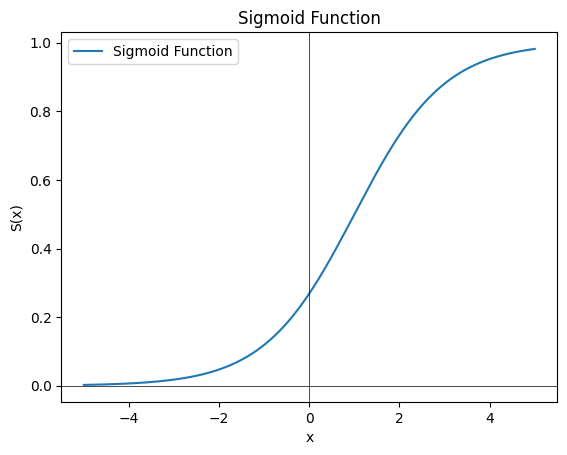

In [5]:
# Define the Sigmoid function (for our chosen threshold)
def sigmoid_func(x):
  y_val = []
  for x_val in np.arange(len(x)):
    y_val.append((1)/(1+math.exp(-x[x_val] + chosen_threshold)))
  return y_val

# Generate values for x
x = np.linspace(-5, 5, 1000)
y = sigmoid_func(x)

# Create the plot
plt.plot(x, y, label="Sigmoid Function")
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("S(x)")
plt.grid(False)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

### The sigmoid function is what we will use as our "activation" function.

The activation function tells us whether or not our perceptron fires.

You'll probably remember from your lecture with Max (and what I hopefully was able to remind you of above), that one big benefit to perceptron's is that they learn, so they are able to update their weights to get a more accurate prediction.

### Let's now incorporate some learning...

Conceptually, what exactly is missing for us to be able to do this?
If you remember, Max mentioned in his lecture that the way a perceptron learns is through "supervised learning".

*Supervised learning* is when a model learns with explicit labels. In this way, supervised learning uses labeled datasets to train algorithms to predict outcomes and recognize patterns.

As an example, suppose that we have a perceptron trying to learn to correctly classify dogs and cats. You can imagine that we have a real, actual y-values (the target label that we are trying to predict). The perceptron will make its own prediction (y-pred). Let's say that the perceptron is presented with the image of a dog (label 1), but it misclassifies it as a cat (label 0). For the model to be able to "learn", it needs to compare its prediction from the actual target....**but how do we actually make this happen**?

In comes the **Cost Function** (aka Loss Function, error function)

### The Cost Function

The cost function gives a way to qauntify the performance of the model given some data by looking at the difference between the predicted and the expected values. Importantly, the cost function is different depending on which type of model we are using for the data (which makes sense).

We can write this generally with the mathematical equation:

\begin{align}
        Loss = abs(y_{pred} - y_{actual})
    \end{align}



### For this kind of problem, we want to use the log loss, or the Cross Entropy Loss, function.

It is defined mathematically as:

\begin{align}
        \frac{1}{N}\sum_{i=1}^N -(y_i*log(y_{pred}) + (1-y_i)*log(1-y_{pred}))
    \end{align}


Let's build some intuition for why this works -- pardon the math.

What happens in the case that the target class y_i is 1?

Let's plug it in...:
\begin{align}
        \frac{1}{N}\sum_{i=1}^N -(1*log(y_{pred}) + (1-1)*log(1-y_{pred}))
    \end{align}


Which can be re-written as:

\begin{align}
        \frac{1}{N}\sum_{i=1}^N -(1*log(y_{pred}) + 0*log(1-y_{pred}))
    \end{align}


\begin{align}
        \frac{1}{N}\sum_{i=1}^N -(1*log(y_{pred}))
    \end{align}


Otherwise if the target class is zero:

\begin{align}
        \frac{1}{N}\sum_{i=1}^N -(0*log(y_{pred}) + (1-0)*log(1-y_{pred}))
    \end{align}

\begin{align}
        \frac{1}{N}\sum_{i=1}^N -(0 + (1)*log(1-y_{pred}))
    \end{align}


\begin{align}
        \frac{1}{N}\sum_{i=1}^N -(1)*log(1-y_{pred})
    \end{align}



I know this is a lot...thankfully we can simplify it a little bit. If instead of taking the overall cost (across all training samples), we take the cost at each training sample, then this equation looks a little less scary.

\begin{align}
        -(y*log(y_{pred}) + (1-y)*log(1-y_{pred}))
    \end{align}


The way we will incorporate this to arrive at the more complicated/scary equation is by calculating the loss at each inidvidual training sample, adding them all together, and then dividing by the "n" training samples...This is just the average entropy :)

In [9]:
def sigmoid(z):
  pred = 1/(1+math.exp(-z))
  return pred


In [16]:
# To make this a little more realistic, let's start with some code implementation

def compute_cost_lr(X,y,w):
  """
  Computes cost for a logistic regression function
  Inputs:
    X (ndarray with shape (m,n)): Data: we have m examples with n features (this is equivalent to having x_1, x_2)
    y (ndarray with shape (m,)): Target or "real" y values
    w (ndarray (n,)): model parameters of weights
  Outputs:
    cost (scalar): will return the average cost as explained above
  """
  m = X.shape[0]
  cost = 0.0 #starting point for our cost function (we haven't given anything, so it's zero)

  # now we will calculate the cost per each training sample
  for i in range(m):
    z_i = np.dot(X[i],w)
    y_pred = sigmoid(z_i)
    # add the cost for each of these iterations
    cost += -(y[i]*np.log(y_pred) + (1-y[i])*np.log(1-y_pred))
    #print('The individual loss value at this iteration is: ', (-(y[i]*np.log(y_pred) + (1-y[i])*np.log(1-y_pred))))
  cost = cost/m # total number of training samples
  return cost

In [43]:
X_vals = np.array([[0.5,1.5],[1,1],[1.5,0.5],[3,0.5],[2,2],[1,2.5]])
y_vals = np.array([1,0,0,1,1,1])
w_test = np.array([0,0])

In [44]:
print(compute_cost_lr(X_vals,y_vals,w_test))

0.6931471805599453


### Implementing the Cost Function

At this point, we have calculated the overall cost, but for us to be able to learn, we really need to be able to update the weights.

To update the weights, we will use something called "gradient descent". Gradient descent is an **optimization** algorithm used by machine learning that allows us to continuously minimize the loss or the cost. It does this by leveraging a convex function so that we can minimize the loss in what is hopefully the most optimal/efficient way.

How does this actually happen?

We start off at some arbitrary point point and evaluate the performance (compute the cost). Then at that point, we need to find derivative (more accurately the partial derivative) and move towards a cost of zero. To be able to minimize the cost function, we need two parameters:
1. The cost function (of course!)
2. The learning rate (typically a small value)

That is, we want to take the derivative of the cost function with respect to the weights, leaving us with the following simplified equation:

\begin{align}
        w_{j} = w_{j} - η*(∂J(w)/∂w_{j})
    \end{align}

In this instance the "eta" is our learning rate. Please don't get too bogged down in the math details, which I will skip for now, but the equation above can be rewritten as:


\begin{align}
        w_{j} = w_{j} - η*((y_{pred} - y_{target})*X_{i})
    \end{align}

This is just one instance of caclulating the gradient (derivative) at one iteration. We need to do this for all our iterations and then take the average. We can then apply this to our weights where we must update the weights all together.

Let's break this down into two differen tparts where we first compute the gradient (right hand side of the equation) and then we update our weights (left hand side of the equation)

In [45]:
# here is some code:

def compute_gradient_lr(X,y,w):
  """
  Computes gradient for a logistic regression function
  Inputs:
    X (ndarray with shape (m,n)): Data: we have m examples with n features (this is equivalent to having x_1, x_2)
    y (ndarray with shape (m,)): Target or "real" y values
    w (ndarray (n,)): model parameters of weights
  Outputs:
    dj_dw (ndarray with shape (n,)): The gradient of the cost function w.r.t parameter w
  """

  m,n = X.shape # let's get the m examples and the n features...

  djdw = np.zeros((n,)) # our partial derivative starts off at zero with the length of the number of features that we have

  # iterate through all our examples
  for i in range(m):
    z_i = np.dot(X[i],w)
    y_pred = sigmoid(z_i)
    error_i = y_pred - y[i]

    # now iterate through all our features so that we can compute our gradients!
    for j in range(n):
      djdw[j] = djdw[j] +error_i * X[i,j]
  djdw = djdw/m
  return djdw

In [46]:
print(compute_gradient_lr(X_vals,y_vals,w_test))
# Note that we example has two weights because we have two features

[-0.33333333 -0.41666667]


Though this is the right start (and we are certainly on our way!) we need to apply our computed gradients to our function.

Let's go ahead and do gradient descent.

In [52]:
## Here's some more code :)

def gradient_descent_lr(X,y,w,alpha,num_iters):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target or "real" y values
      w (ndarray (n,)): model parameters for weights
      alpha (float)      : Learning rate (earlier referred to as eta)
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
    """
    # store the cost over time so that we can graph this
    J_history = []
    w_init = copy.deepcopy(w)
    for i in range(num_iters):
      djdw = compute_gradient_lr(X,y,w_init)
      # update the parameters
      w_init = w_init - alpha*djdw

      # save the cost J at each iteration
      if i < 100000:
        J_history.append(compute_cost_lr(X,y,w_init))

      # Print cost every at intervals 10 times or as many iterations if < 10
      if i% math.ceil(num_iters / 10) == 0:
          print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    return w_init, J_history

In [53]:
w_updated,_ = gradient_descent_lr(X_vals,y_vals,w_test,0.025,10000)

Iteration    0: Cost 0.6861240646037278   
Iteration 1000: Cost 0.5269085515789192   
Iteration 2000: Cost 0.5268778795276893   
Iteration 3000: Cost 0.5268778424803225   
Iteration 4000: Cost 0.5268778424349922   
Iteration 5000: Cost 0.5268778424349366   
Iteration 6000: Cost 0.5268778424349366   
Iteration 7000: Cost 0.5268778424349366   
Iteration 8000: Cost 0.5268778424349366   
Iteration 9000: Cost 0.5268778424349366   


You might notice that our model isn't erally doing that well...it's okay. This is for demonstration purposes. I will also point out that we don't have a "bias" term.